ML Model for Directing customers to subscription through app behavior analysis

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [47]:
dataset = pd.read_csv('P39-CS3-Data//appdata10.csv')

In [48]:
dataset.head()


,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [49]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)
#data cleaning for the hour column

In [51]:
data2 = dataset.copy().drop(columns=['user','enrolled','screen_list','enrolled_date','first_open'])
data2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


Creating a histogram for the data.

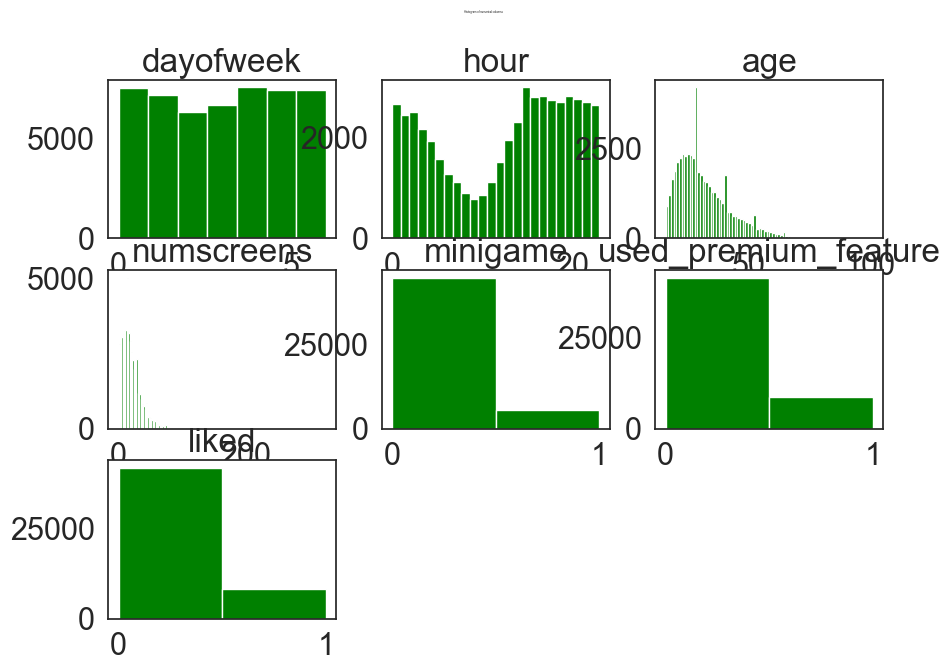

In [ ]:
plt.figure(figsize=(10,7))
plt.suptitle("Histogram of numerical columns",fontsize = '15')
for i in range(1,data2.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(data2.columns.values[i-1])
    vals = np.size(data2.iloc[:,i-1].unique())

    plt.hist(data2.iloc[:,i-1],bins = vals, color='green')



CORRELATION PLOT

<Axes: title={'center': 'Correlation With response variable'}>

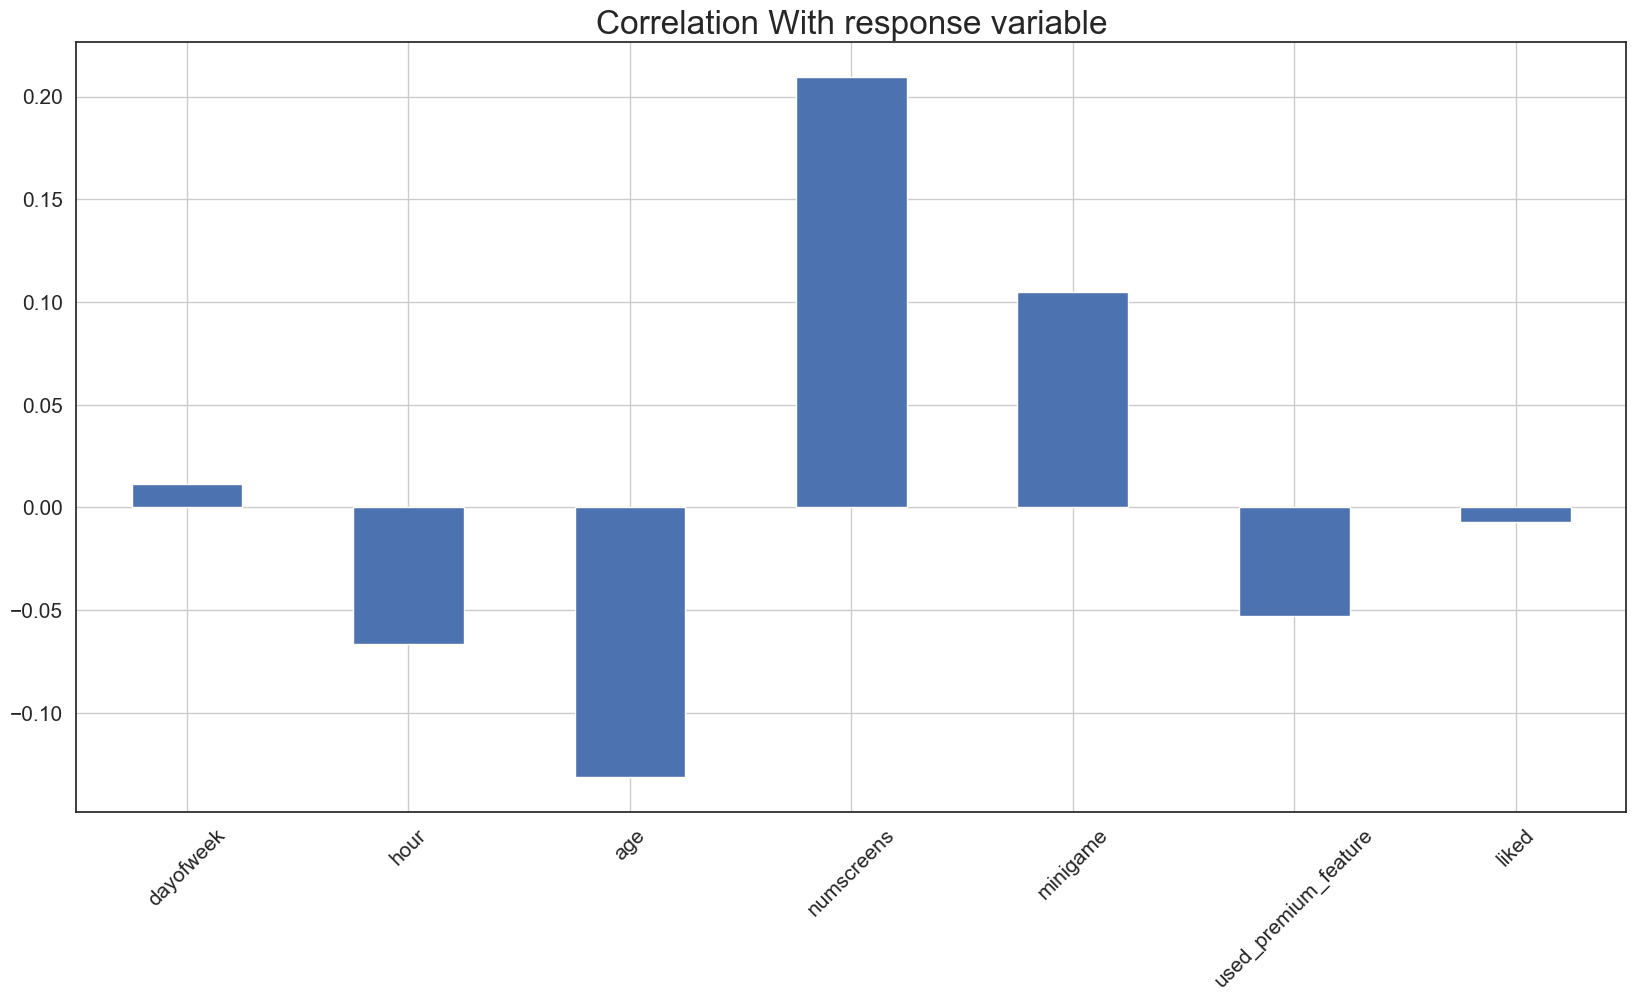

In [53]:
data2.corrwith(dataset.enrolled).plot.bar(figsize =(20,10),title="Correlation With response variable",fontsize = 15,rot=45,grid = True)


1. The later the day of the week more likely to get enrolled.
2. the older the person less likely to enroll.
3. The earier the hour more likely to enroll.
4. People who play the minigame are more likely to enroll.
5. The people who have used a premium feature are less likely to enroll.
6. The more the number of screens more likely is the person to enroll.


CORRELATION MATRIX

<Axes: >

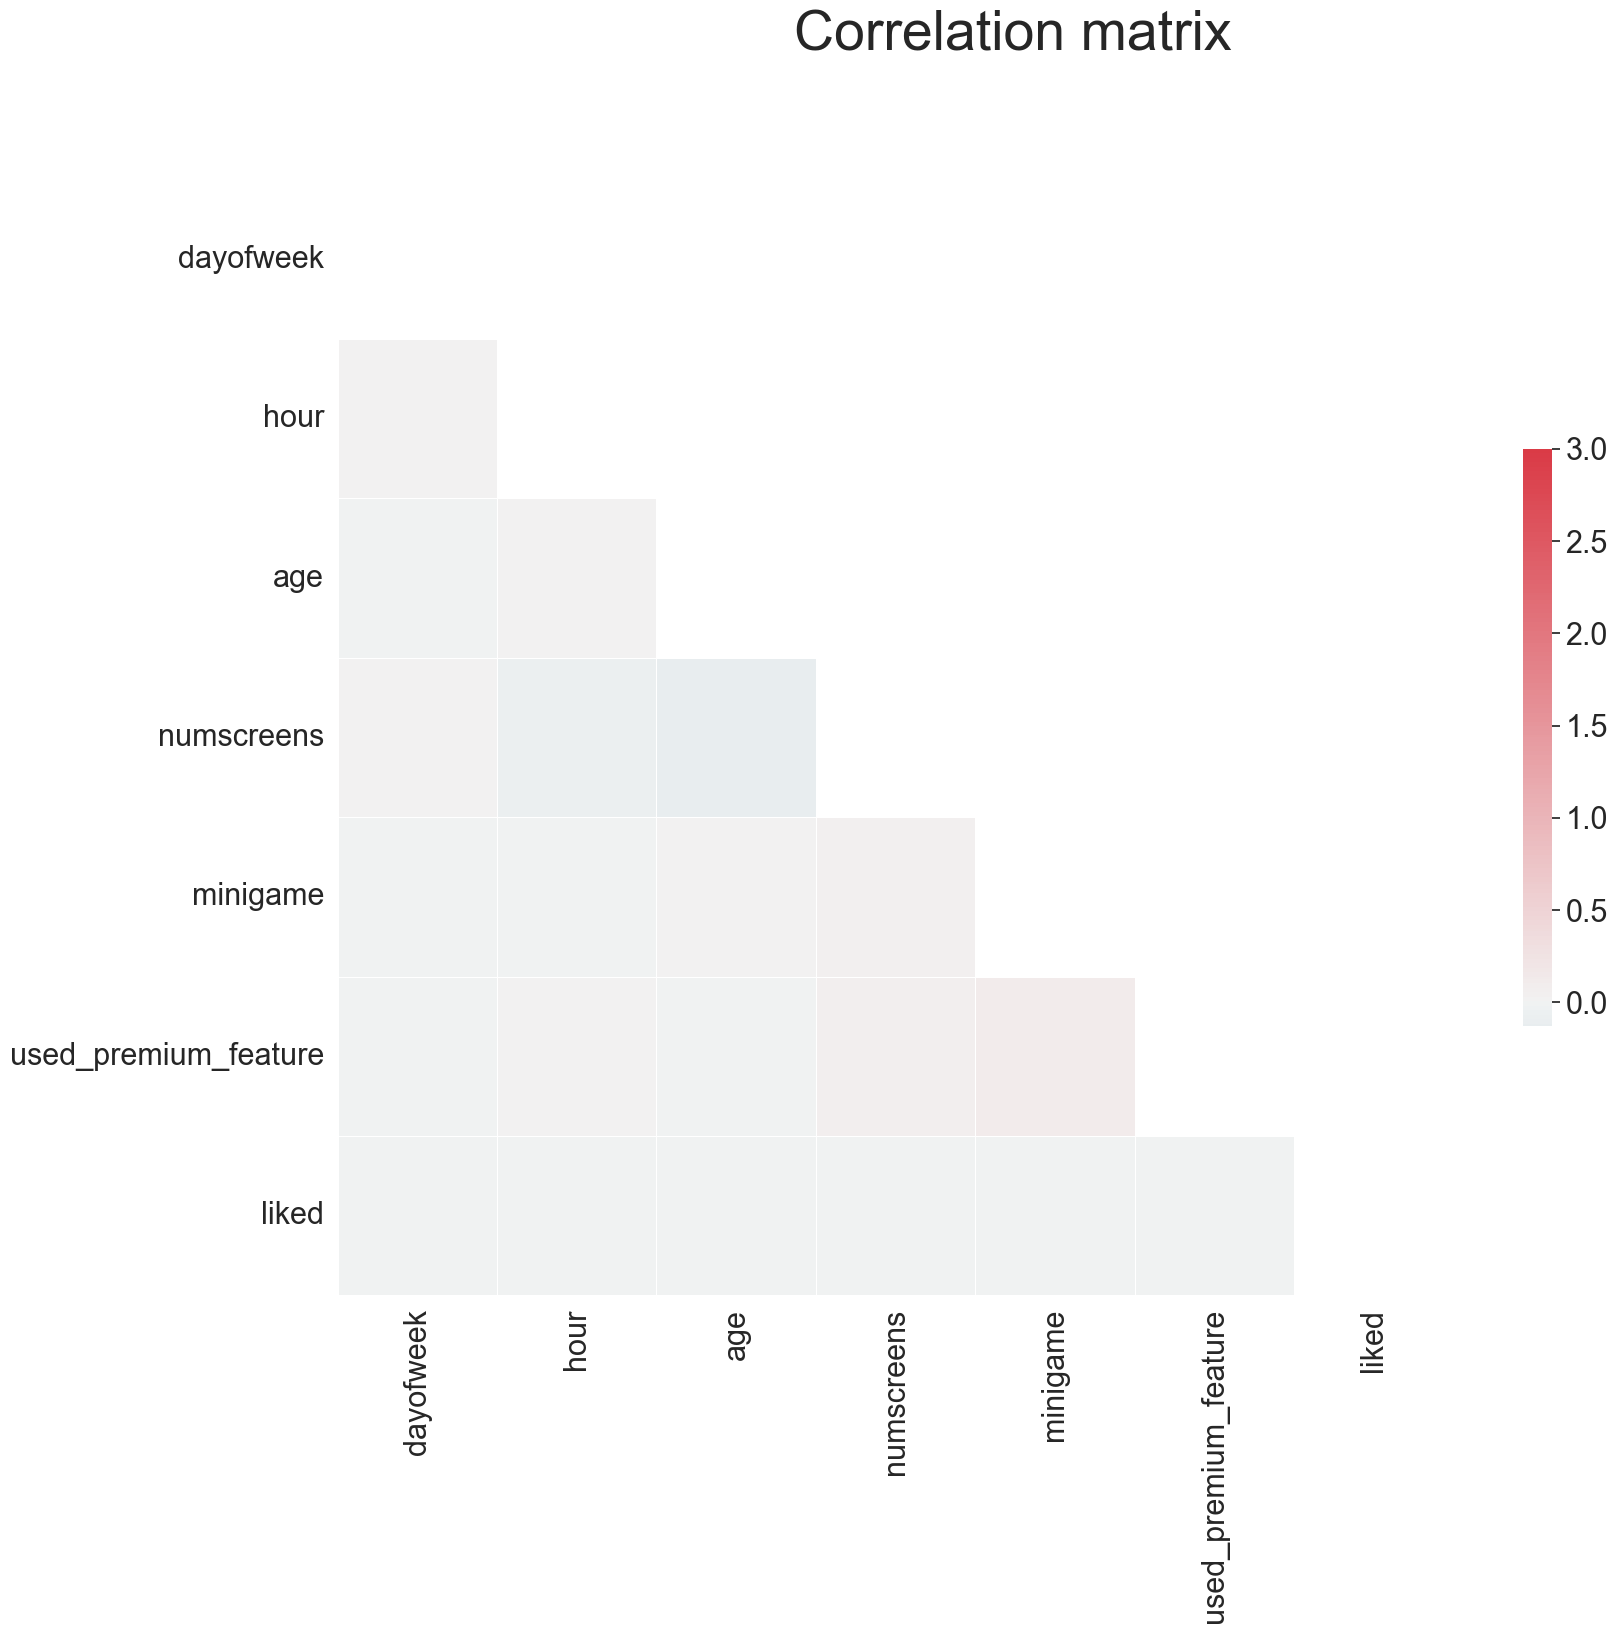

In [54]:
sns.set(style = "white",font_scale=2)
#compute the correlation matrix
corr = data2.corr()

#Generating a mask for the upper tirangle
mask = np.zeros_like(corr,dtype =np.bool)
mask[np.triu_indices_from(mask)]=True

f, ax = plt.subplots(figsize=(18,15))
f.suptitle("Correlation matrix",fontsize = 40)

cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr,mask = mask,cmap=cmap,vmax = 3,center = 0,square=True,linewidth = 0.5,cbar_kws={"shrink":.5})



Feature Engineering

In [55]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [56]:

dataset["first_open"]=[parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in dataset["first_open"]]
dataset["enrolled_date"]=[parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in dataset["enrolled_date"]]

In [57]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

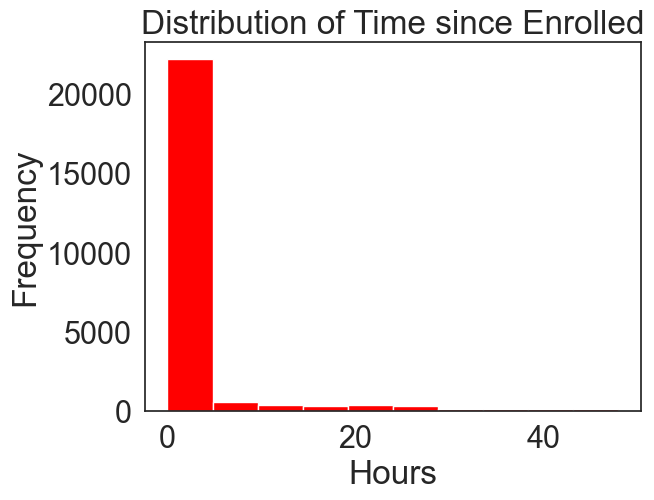

In [58]:

dataset["enrolled_date"] = pd.to_datetime(dataset["enrolled_date"], errors='coerce')
dataset["first_open"] = pd.to_datetime(dataset["first_open"], errors='coerce')

# Calculate the time difference in hours
dataset["difference"] = (dataset["enrolled_date"] - dataset["first_open"]).dt.total_seconds() / 3600

# Plot the histogram
plt.hist(dataset["difference"].dropna(), color='red', range = [0,48])
plt.title("Distribution of Time since Enrolled")
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.show()




In [59]:
#fomratting the screen_list field
top_screens = pd.read_csv("P39-CS3-Data/top_screens.csv").top_screens.values

In [60]:
dataset.loc[dataset.difference>48,'enrolled'] =0
dataset = dataset.drop(columns = ['difference','enrolled_date','first_open'])
print(dataset.columns)

Index(['user', 'dayofweek', 'hour', 'age', 'screen_list', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'liked'],
      dtype='object')


In [61]:
dataset['screen_list'] = dataset.screen_list.astype(str) +','
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset["screen_list"] = dataset.screen_list.replace(sc+',',"")

In [62]:
dataset["Other"]  = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns = ["screen_list"])

In [63]:
#funnels
savings_screens = ["Saving1","Saving2" ,"Saving2Amount","Saving4","Saving5","Saving6","Saving7","Saving8","Saving9","Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)

credit_screens = ["Credit1","Credit2","Credit3","Credit3Container","Credit3Dashboard"]
dataset["CreditCount"] = dataset[credit_screens].sum(axis=1)
dataset = dataset.drop(columns=credit_screens)

cc_screens = ["CC1","CC1Category","CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = ["Loan","Loan2","Loan3","Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)





In [64]:
dataset.head()


,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CreditCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,13,0,0,0,2
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,11,0,0,0,2
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,3,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,17,0,3,0,2
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,19,0,3,0,2


In [65]:
dataset.to_csv("new_appdata.csv",index = False)